# [Python Reference Link](http://www.data8.org/sp20/python-reference.html)
*Run the cell below so that we can set our modules up*

In [1]:
import numpy as np
from datascience import *

# These lines set up graphing capabilities.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Creating Functions

In [3]:
def triple(sample_input):
    #
    output = sample_input * 3
    return output

In [4]:
triple()

TypeError: triple() missing 1 required positional argument: 'sample_input'

In [5]:
triple(8)

24

In [6]:
triple('Haha')

'HahaHahaHaha'

In [11]:
def convert_fahrenheit_to_celsius(degree_f):
    degree_c = (degree_f - 32)*(5/9)
    return degree_c
    

In [10]:
convert_fahrenheit_to_celsius(100)

37.77777777777778

# Applying Functions
We will use Spring 2024's survey data to practice applying our functions

In [12]:
math211_survey = Table.read_table('Sp24_Math_211_Survey_cleaned.csv')
math211_survey.show(50)

Timestamp,Surveyor,GPA,Introversion/Extroversion,Pets,Hand,Sleep,Chicken,School,Travel,Day of Week,School Subject,Season,Languages,TV Show
1/22/2024 14:27,(Redacted),3.95,9,"Cats, Dogs",Left-handed,On my side,Meat Alternative,10,Hungary,Friday,Political Science,Fall,English,Designated Survivor
1/22/2024 14:28,(Redacted),3.87,4,Dogs,Right-handed,On my side,Boneless,7,Japan,Friday,Math,Winter,English and Japanese (not really),Avatar
1/22/2024 14:32,(Redacted),3.5,6,Cats,Right-handed,On my side,Boneless,7,New York,Wednesday,Mathematics,Summer,"Burmese, English",Vampire diaries
1/22/2024 14:33,(Redacted),3.4,8,nan,Right-handed,On my side,Bone-in,7,Spain,Friday,Math,Summer,"Thai, Burmese, English",Stranger Things
1/22/2024 14:36,(Redacted),3.97,6,"Cats, Dogs",Right-handed,On my side,Boneless,9,Hawaii,Saturday,Physics,Summer,English Spanish,Mushoku Tensei
1/22/2024 14:38,(Redacted),3.4,6,Dogs,Right-handed,On my side,Bone-in,3,Japan,Friday,Math,Summer,English,Shameless
1/22/2024 14:40,(Redacted),3.75,6,nan,Left-handed,On my side,Bone-in,5,Europe,Friday,Science,Fall,"Burmese, English",Mandalorian
1/22/2024 14:40,(Redacted),3.62,3,Dogs,Right-handed,On my back,Bone-in,7,No Response,Saturday,Physics,Spring,English,Jujutsu Kaisen
1/22/2024 14:42,(Redacted),3.98,8,Dogs,Right-handed,On my back,Bone-in,8,Japan,Friday,Economics,Summer,English,Suits
1/22/2024 14:43,(Redacted),3.97,4,Cats,Left-handed,On my side,Bone-in,8,Japan,Friday,Math,Winter,English,Teen Titans


### Inquiry: 
Although the survey lists our responses about desired travel destination, **by name**, I want to capture a sense of **how far** they are from our campus. So, I used a website (called ["distance.to"](https://www.distance.to/San-Bruno,CA,USA) to find the distance to each mentioned travel destination and I got the following table: 

In [13]:
travel_distances = Table.read_table('Travel_Destination_Distance_and_PrimaryLanguage.csv')
travel_distances.show()

Place,Distance (mi),Primary Language
Colombia,3869.09,Spanish
Greece,6679.73,Greek
Austria,5962.79,German
Croatia,6144.69,Croatian
Anaheim,363.72,English
Hungary,6144.98,Hungarian
Japan,5142.42,Japanese
New York,2570.48,English
Spain,5806.71,Spanish
Hawaii,2344.8,English


### Practice Exercises:

##### Question: How far away is Japan?

In [17]:
travel_distances.where('Place','Japan').column('Distance (mi)').item(0)

5142.42

##### Question: How far away is Thailand?

In [18]:
travel_distances.where('Place','Thailand').column('Distance (mi)').item(0)

7809.68

##### Question: How far away is Lake Tahoe?

In [19]:
travel_distances.where('Place','Lake Tahoe').column('Distance (mi)').item(0)

159.44

##### Question: How far away is India?

In [20]:
travel_distances.where('Place','India').column('Distance (mi)').item(0)

8087.96

##### Question: How far away is Oregon?

In [21]:
travel_distances.where('Place','Oregon').column('Distance (mi)').item(0)

451.25

##### Question: What primary language is spoken Brazil?

In [25]:
travel_distances.where('Place','Brazil ').column('Primary Language').item(0)

'Portugese'

### Converting the process as a function

In [26]:
def find_distance(travel_destination):
    distance = travel_distances.where('Place',travel_destination).column('Distance (mi)').item(0)
    return distance

In [28]:
distance

NameError: name 'distance' is not defined

In [31]:
find_distance('Myanmar')

7678.57

### Applying our function to the table
First, we will start with looking at how to import our data into the notebook:
<img src="apply_function.png" alt="drawing" width="1200"/>
*From the [Python reference](http://www.data8.org/sp20/python-reference.html) page

In [36]:
# Selecting a narrower set of columns (for easier viewing)
math211_survey.select('Timestamp','Surveyor','GPA','Introversion/Extroversion','Travel')

Timestamp,Surveyor,GPA,Introversion/Extroversion,Travel
1/22/2024 14:27,(Redacted),3.95,9,Hungary
1/22/2024 14:28,(Redacted),3.87,4,Japan
1/22/2024 14:32,(Redacted),3.5,6,New York
1/22/2024 14:33,(Redacted),3.4,8,Spain
1/22/2024 14:36,(Redacted),3.97,6,Hawaii
1/22/2024 14:38,(Redacted),3.4,6,Japan
1/22/2024 14:40,(Redacted),3.75,6,Europe
1/22/2024 14:40,(Redacted),3.62,3,No Response
1/22/2024 14:42,(Redacted),3.98,8,Japan
1/22/2024 14:43,(Redacted),3.97,4,Japan


In [39]:
distance_array = math211_survey.apply(find_distance,'Travel')
math211_survey.with_column('Travel Distance',distance_array).select('Timestamp','Surveyor','GPA','Introversion/Extroversion','Travel','Travel Distance')

Timestamp,Surveyor,GPA,Introversion/Extroversion,Travel,Travel Distance
1/22/2024 14:27,(Redacted),3.95,9,Hungary,6144.98
1/22/2024 14:28,(Redacted),3.87,4,Japan,5142.42
1/22/2024 14:32,(Redacted),3.5,6,New York,2570.48
1/22/2024 14:33,(Redacted),3.4,8,Spain,5806.71
1/22/2024 14:36,(Redacted),3.97,6,Hawaii,2344.8
1/22/2024 14:38,(Redacted),3.4,6,Japan,5142.42
1/22/2024 14:40,(Redacted),3.75,6,Europe,5592.38
1/22/2024 14:40,(Redacted),3.62,3,No Response,0
1/22/2024 14:42,(Redacted),3.98,8,Japan,5142.42
1/22/2024 14:43,(Redacted),3.97,4,Japan,5142.42


In [ ]:
...

## Side Note: Benford's Law

In [2]:
country_area = Table().read_table('country_area.csv')
country_area

country,country_area_km2,MSD_area
Russia,1.70982e+07,1
Antarctica,1.42e+07,1
Canada[Note 3],9.98467e+06,9
China,9.59696e+06,9
United State,9.52507e+06,9
Brazil,8.51577e+06,8
Australia,7.69202e+06,7
India,3.28726e+06,3
Argentina,2.7804e+06,2
Kazakhstan,2.7249e+06,2


In [50]:
def extract_first_digit(this_number):
    this_number_as_a_string = str(this_number)
    first_number = this_number_as_a_string[0]
    return int(first_number)

In [51]:
extract_first_digit(9345)

9

In [55]:
area_array = country_area.apply(extract_first_digit,'country_area_km2')
country_area = country_area.with_column('First Digit',area_array)
country_area#.where('First Digit',0)

country,country_area_km2,MSD_area,First Digit
Russia,1.70982e+07,1,1
Antarctica,1.42e+07,1,1
Canada[Note 3],9.98467e+06,9,9
China,9.59696e+06,9,9
United State,9.52507e+06,9,9
Brazil,8.51577e+06,8,8
Australia,7.69202e+06,7,7
India,3.28726e+06,3,3
Argentina,2.7804e+06,2,2
Kazakhstan,2.7249e+06,2,2


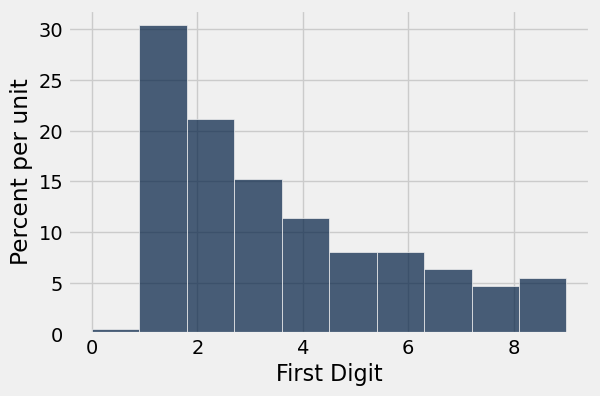

In [53]:
country_area.hist('First Digit')